# HW 3: Optimization


The submission of the homeworks has **NO** deadline. You can submit them whenever you want, on Virtuale. You are only required to upload it on Virtuale **BEFORE** your exam session, since the Homeworks will be a central part of the oral exam. 

You are asked to submit the homework as one of the two, following modalities:
* A PDF (or Word) document, containing screenshoots of code snippets, screeshots of the results generated by your code, and a brief comment on the obtained results.
* A Python Notebook (i.e. a `.ipynb` file), with cells containing the code required to solve the indicated exercises, alternated with a brief comment on the obtained results in the form of a markdown cell. We remark that the code **SHOULD NOT** be runned during the exam, but the student is asked to enter the exam with all the programs **already executed**, with the results clearly visible on the screen.

Joining the oral exam with a non-executed code OR without a PDF file with the obtained results visible on that, will cause the student to be rejected.


## Optimization via Gradient Descent
In this Homework, we will consider a general optimization problem:

$$
x^* = \arg\min_{x \in \mathbb{R}^n}f(x).
$$

where, $f: \mathbb{R}^n \to \mathbb{R}$ is a differentiable function for which we know how to compute $\nabla f(x)$.
This is done by the Gradient Descent (GD) method: an iterative algorithm that, given an initial iterate $x_0 \in \mathbb{R}^n$ and a positive parameter $\alpha_k > $ called *step size*, computes:

$$
x_{k+1} = x_k − \alpha_k \nabla f (x_k).
$$

You are asked to implement the GD method in Python and to test it with some exemplar functions. In particular:

*  Write a script that implement the GD algorithm with fixed step size (i.e. no backtracking), with the input-output structure discussed in the first Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
* Write a script that implement the GD algorithm with backtracking, with the input-output structure discussed in the second Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
* Test the algorithm above on the following functions:
    1. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2, 
       $$

       for which the true solution is $x^* = (3, 1)^T$.

    2. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2, 
       $$

       for which the true solution is $x^* = (1, 2)^T$.
    3. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

       $$
       f(x) = \frac{1}{2}|| Ax - b ||_2^2, 
       $$

       where $A \in \mathbb{R}^{n times n}$ is the Vandermonde matrix associated with the vector $v \in \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0,1]$, and $b \in \mathbb{R}^n$ is computed by first setting $x^* = (1, 1, \dots ,1)^T$, and then $b = A x^*$. Try for different values of $n$ (e.g. $n = 5,10,15, \dots$).
    4. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

       $$
       f(x) = \frac{1}{2} || Ax - b ||_2^2 + \frac{\lambda}{2} ||x||_2^2, 
       $$

       where $A \in \mathbb{R}^{n times n}$ and $b \in \mathbb{R}^n$ are the same of the exercise above, while $\lambda$ is a fixed value in the interval $[0, 1]$. Try different values of $\lambda$ and comment the result.
    5. $f: \mathbb{R} \to \mathbb{R}$ such that:

       $$
       f(x) = x^4 + x^3 - 2x^2 - 2x.
       $$

* For each of the functions above, test the GD method with and without backtracking, trying different values for the step size $\alpha > 0$ when backtracking is not employed. Comment on the results.
* Plot the value of $||\nabla f(x_k)||_2$ as a function of $k$, check that it goes to zero, and compare the convergence speed (in terms of the number of iterations $k$) for the different values of $\alpha > 0$ and with backtracking.
* For each of the points above, use:
  - `x0` = $(0, 0, \dots, 0)^T$ (except for function 5, which is discussed in the following point),
  - `kmax` = 100,
  - `tolf` = `tolx` = `1e-5`. 
  Also, when the true solution $x^*$ is given, plot the error $||x_k−x^*||_2$ as a function of $k$.
* Plot the graph of the non-convex function 5 in the interval $[−3,3]$, and test the convergence of GD with different values of `x0` (of your choice) and different step-sizes. When is the convergence point the global minimum?
* *Hard (optional):* For functions 1 and 2, show the contour plot around the true minimum and visualize the path described by the iterations, i.e. representing on the contour plot the position of each iterate computed by the GD algorithm. See the `plt.contour` documentation.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

We start defining our functions and their gradient function

In [49]:
## FUNZIONE 1

def grad_f_1(x):
    x1, x2 = x
    return np.array([2*(x1-3), 2*(x2-1)])

def f_1(x):
    x1, x2 = x
    return (x1-3)**2+(x2-1)**2


## FUNZIONE 2

def grad_f_2(x):
    x1, x2 = x
    return np.array([20*(x1-1), 2*(x2-2)])

def f_2(x):
    x1, x2 = x
    return 10*(x1-1)**2+(x2-2)**2

## FUNZIONE 3

def generate_vandermonde_and_b(n):
    v = np.linspace(0, 1, n) 
    A = np.vander(v, increasing=True) 
    x_star = np.ones(n)
    b = A @ x_star 
    return A, b

def f_3(x, A, b):
    result = 0.5*((np.linalg.norm(A@x-b))**2)
    return result

def grad_f_3(x, A, b):
    residual = A.T@(A @ x - b)
    return np.array(residual)


## FUNZIONE 4
def f_4(x, A, b, lamb):
    result = 0.5*((np.linalg.norm(A@x-b))**2) + lamb/2*((np.linalg.norm(x))**2)
    return result

def grad_f_4(x, A, b, lamb):
    residual = A.T@(A@x-b) + lamb*x
    return np.array(residual)


## FUNZIONE 5
def f_5(x):
    return (x**4)+(x**3)-2*(x**2)-(2*x)

def grad_f_5(x):
    return 4*(x**3)+(3*(x**2))-(4*x)-2

We procede defining the functions of gradient descent and backtracking that we will use doring our observations

In [50]:
import numpy as np
import matplotlib.pyplot as plt

## Define the gradient of the function

## We also define the stopping parameters, useful later
tolf = tolx = 1e-5

# Gradient Descent functions
def gradient_descent(grad_f, init_state, maxit, desc_rate):
    gradient_progress = {}
    x_k = {}
    ak = desc_rate
    x = np.array(init_state, dtype=float)  # Convert initial state to NumPy array
    grad_x0 = grad_f(x)
    x_prev = x
    i = 0
    while True :
        grad = grad_f(x)
        gradient_progress[i] = np.linalg.norm(grad)  # Store gradient norm
        x = x - ak * grad  # Gradient descent step
        x_k[i] = x.copy()
        i += 1
        
        if (((np.linalg.norm(grad)<=(tolf*np.linalg.norm(grad_x0))) and
             (np.linalg.norm(x-x_prev) <= tolx)) or
             i >= maxit):
            break
        x_prev = x
    return gradient_progress, x, x_k

def gradient_descent_matrix(grad_f, A, b, init_state, maxit, desc_rate, lamb=None):
    gradient_progress = {}
    x_k = {}
    ak = desc_rate
    x = np.array(init_state, dtype=float)  # Convert initial state to NumPy array
    if lamb is not None:
        grad_x0 = grad_f(x, A, b, lamb)
    else: 
        grad_x0 = grad_f(x, A, b)
    x_prev = x
    i = 0
    while True:
        if lamb is not None:
            grad = grad_f(x, A, b, lamb)
        else: 
            grad = grad_f(x, A, b)
        gradient_progress[i] = np.linalg.norm(grad)  # Store gradient norm
        x = x - ak * grad  # Gradient descent step
        x_k[i] = x.copy()
        i += 1
        if (((np.linalg.norm(grad)<=(tolf*np.linalg.norm(grad_x0))) and
             (np.linalg.norm(x-x_prev) <= tolx)) or
             i >= maxit):
            break
        x_prev = x
    return gradient_progress, x

def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    try:
        while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
            alpha = tau * alpha
        return alpha
    
    ## The except is for when we input a function that returns a monodimensional value
    except ValueError:
        while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
            alpha = tau * alpha
        return alpha
    
def gradient_descent_with_backtracking(f, grad_f, init_state, maxit):
    x = np.array(init_state, dtype=float)  # Convert initial state to NumPy array
    gradient_progress = {}
    x_k = {}
    grad_x0 = grad_f(x)
    x_prev = x
    i = 0
    for i in range(maxit):
        grad = grad_f(x)
        gradient_progress[i] = np.linalg.norm(grad)  # Store gradient norm
        x_k[i] = x.copy()  # Store x at iteration i
        ak = backtracking(f, grad_f, x)
        x = x - ak * grad  # Gradient descent step
        i += 1
        if (((np.linalg.norm(grad)<=(tolf*np.linalg.norm(grad_x0))) and
             (np.linalg.norm(x-x_prev) <= tolx)) or
             i >= maxit):
            break
        x_prev = x
    return gradient_progress, x, x_k

def backtracking_m(f, grad_f, x, A, b, lamb=None):
    alpha = 1
    c = 0.8
    tau = 0.25
    if lamb is None:
        while f(x - alpha * grad_f(x, A, b), A, b) > f(x, A, b) - c * alpha * np.linalg.norm(grad_f(x, A, b), 2) ** 2:
            alpha = tau * alpha
        return alpha
    else:
        while f(x - alpha * grad_f(x, A, b, lamb), A, b, lamb) > f(x, A, b, lamb) - c * alpha * np.linalg.norm(grad_f(x, A, b, lamb), 2) ** 2:
            alpha = tau * alpha
        return alpha    

def gradient_descent_with_backtracking_m(f, grad_f, A, b, init_state, maxit, lamb=None):
    x = np.array(init_state, dtype=float)  # Convert initial state to NumPy array
    gradient_progress = {}
    x_k = {}
    print(f"grad_f type: {type(grad_f)}")
    if lamb is None:
        grad_x0 = grad_f(x, A, b)
    else:         
        grad_x0 = grad_f(x, A, b, lamb)
    x_prev = x
    i = 0
    for i in range(maxit):
        if lamb is None:
            grad = grad_f(x, A, b)
        else:         
            grad = grad_f(x, A, b, lamb)
        gradient_progress[i] = np.linalg.norm(grad)  # Store gradient norm
        x_k[i] = x.copy()  # Store x at iteration i
        ak = backtracking_m(f, grad_f, x, A, b, lamb)
        x = x - ak * grad  # Gradient descent step
        i += 1
      
        if (((np.linalg.norm(grad)<=(tolf*np.linalg.norm(grad_x0))) and
             (np.linalg.norm(x-x_prev) <= tolx)) or
             i >= maxit):
            break
        x_prev = x
    return gradient_progress, x


## Analyzing function 1

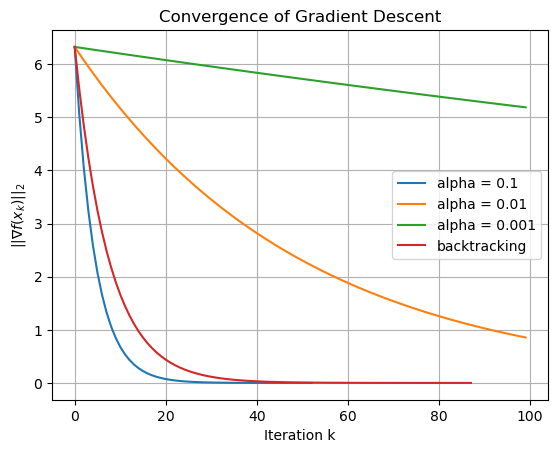

In [51]:
x0 = np.zeros(2)
maxit = 100
gradient_a_1, x_a_1, xk_a_1 = gradient_descent(grad_f_1, x0, maxit, 0.1)
gradient_b_1, x_b_1, xk_b_1 = gradient_descent(grad_f_1, x0, maxit, 0.01)
gradient_c_1, x_c_1, xk_c_1 = gradient_descent(grad_f_1, x0, maxit, 0.001)
gradient_d_1, x_d_1, xk_d_1 = gradient_descent_with_backtracking(f_1, grad_f_1, x0, maxit)
# Prepare data for plotting
xa = list(gradient_a_1.keys())
ya = list(gradient_a_1.values())
xb = list(gradient_b_1.keys())
yb = list(gradient_b_1.values())
xc = list(gradient_c_1.keys())
yc = list(gradient_c_1.values())
xd = list(gradient_d_1.keys())
yd = list(gradient_d_1.values())
# Plot the results
plt.plot(xa, ya, label="alpha = 0.1")
# plt.yscale('log') 
plt.plot(xb, yb, label="alpha = 0.01")
plt.plot(xc, yc, label="alpha = 0.001")
plt.plot(xd, yd, label="backtracking")

plt.xlabel("Iteration k")
plt.ylabel(r"$||\nabla f(x_k)||_2$")
plt.title("Convergence of Gradient Descent")
plt.legend()
plt.grid()
plt.show()

We can spot how after 100 iterations the gradient still hasn't reached zero value for the gradient descent with step rate of 0.001. We can also notice how backtracking and the gradient descent with alpha = 0.1 have comparable speed. 

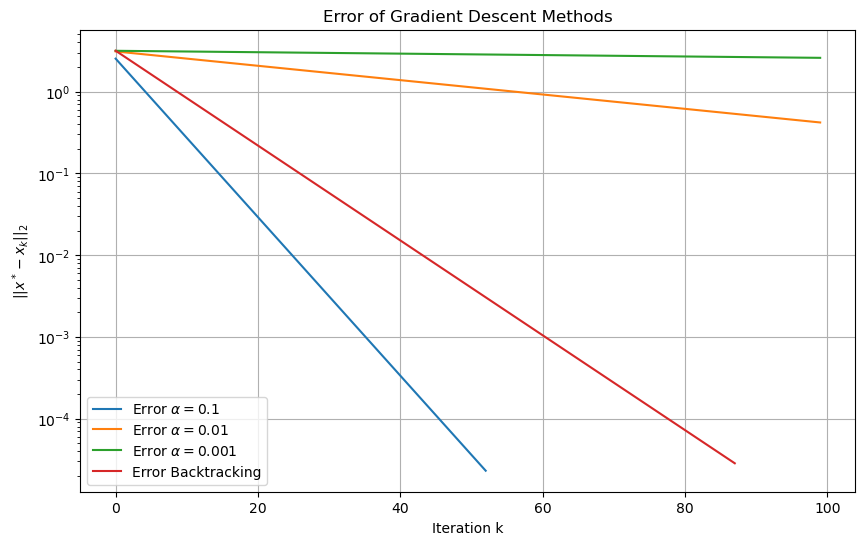

In [52]:
## Plotting the error ||x_k - x*|| 
x_star = np.array([3.0, 1.0])  #

# Prepare data for plotting the error ||x* - x_k[i]||
 
xa = list(xk_a_1.keys())
ya = [np.linalg.norm(x_star - xk_a_1[k]) for k in xa]  # Compute the error for each iteration

xb = list(xk_b_1.keys())
yb = [np.linalg.norm(x_star - xk_b_1[k]) for k in xb]

xc = list(xk_c_1.keys())
yc = [np.linalg.norm(x_star - xk_c_1[k]) for k in xc]

xd = list(xk_d_1.keys())
yd = [np.linalg.norm(x_star - xk_d_1[k]) for k in xd]

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(xa, ya, label=r"Error $\alpha = 0.1$")
plt.plot(xb, yb, label=r"Error $\alpha = 0.01$")
plt.plot(xc, yc, label=r"Error $\alpha = 0.001$")
plt.plot(xd, yd, label="Error Backtracking")

plt.yscale('log')   
plt.xlabel("Iteration k")
plt.ylabel(r"$||x^* - x_k||_2$")
plt.title("Error of Gradient Descent Methods")
plt.legend()
plt.grid(True)
plt.show()


## Function 2

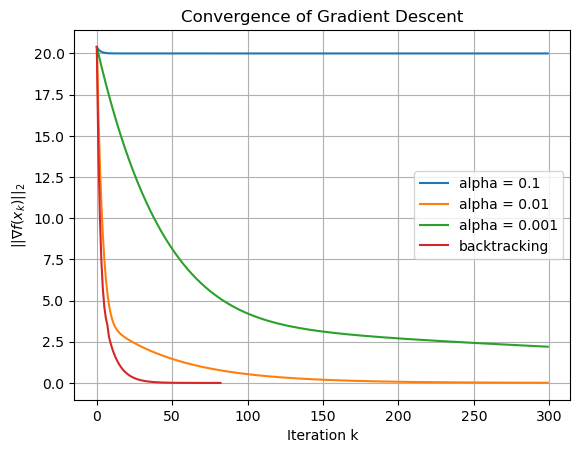

In [53]:
x0 = np.zeros(2)
maxit = 300
gradient_a_2, x_a_2, xk_a_2 = gradient_descent(grad_f_2, x0, maxit, 0.1)
gradient_b_2, x_b_2, xk_b_2 = gradient_descent(grad_f_2, x0, maxit, 0.01)
gradient_c_2, x_c_2, xk_c_2 = gradient_descent(grad_f_2, x0, maxit, 0.001)
gradient_d_2, x_d_2, xk_d_2 = gradient_descent_with_backtracking(f_2, grad_f_2, x0, maxit)
# Prepare data for plotting
xa = list(gradient_a_2.keys())
ya = list(gradient_a_2.values())
xb = list(gradient_b_2.keys())
yb = list(gradient_b_2.values())
xc = list(gradient_c_2.keys())
yc = list(gradient_c_2.values())
xd = list(gradient_d_2.keys())
yd = list(gradient_d_2.values())
# Plot the results
plt.plot(xa, ya, label="alpha = 0.1")
# plt.yscale('log') 
plt.plot(xb, yb, label="alpha = 0.01")
plt.plot(xc, yc, label="alpha = 0.001")
plt.plot(xd, yd, label="backtracking")

plt.xlabel("Iteration k")
plt.ylabel(r"$||\nabla f(x_k)||_2$")
plt.title("Convergence of Gradient Descent")
plt.legend()
plt.grid()
plt.show()

In the second function we see that the alpha = 0.1 is too big and can't manage to reach the minimum of the function, while the optimal value of alpha ends up being alpha = 0.01

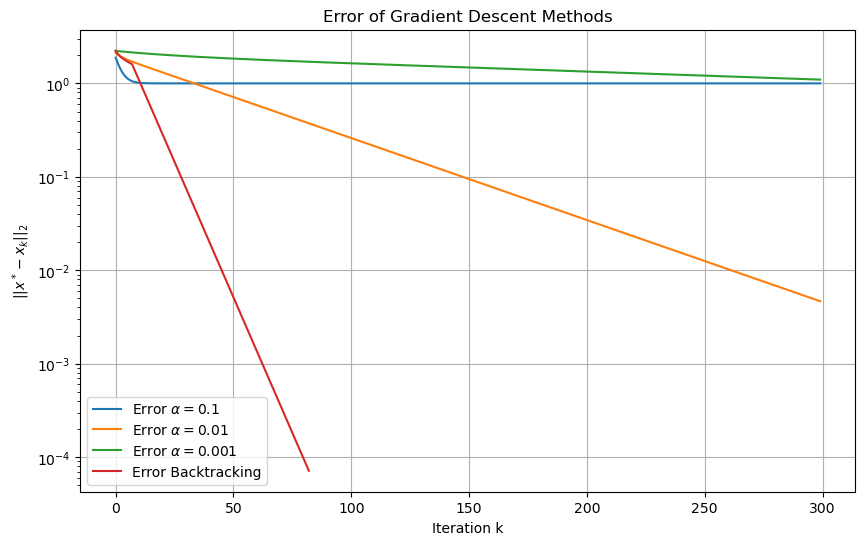

In [54]:
x_star = np.array([1, 2]) 

xa = list(xk_a_2.keys())
ya = [np.linalg.norm(x_star - xk_a_2[k]) for k in xa]   

xb = list(xk_b_2.keys())
yb = [np.linalg.norm(x_star - xk_b_2[k]) for k in xb]

xc = list(xk_c_2.keys())
yc = [np.linalg.norm(x_star - xk_c_2[k]) for k in xc]

xd = list(xk_d_2.keys())
yd = [np.linalg.norm(x_star - xk_d_2[k]) for k in xd]

plt.figure(figsize=(10, 6))

plt.plot(xa, ya, label=r"Error $\alpha = 0.1$")
plt.plot(xb, yb, label=r"Error $\alpha = 0.01$")
plt.plot(xc, yc, label=r"Error $\alpha = 0.001$")
plt.plot(xd, yd, label="Error Backtracking")

plt.yscale('log')  
plt.xlabel("Iteration k")
plt.ylabel(r"$||x^* - x_k||_2$")
plt.title("Error of Gradient Descent Methods")
plt.legend()
plt.grid(True)
plt.show()

## Function 3

{0: np.float64(1.0), 1: np.float64(0.9), 2: np.float64(0.81), 3: np.float64(0.729), 4: np.float64(0.6560999999999999), 5: np.float64(0.59049), 6: np.float64(0.5314409999999999), 7: np.float64(0.4782968999999999), 8: np.float64(0.4304672099999999), 9: np.float64(0.3874204889999999), 10: np.float64(0.34867844009999993), 11: np.float64(0.31381059608999995), 12: np.float64(0.282429536481), 13: np.float64(0.25418658283289997), 14: np.float64(0.22876792454960992), 15: np.float64(0.20589113209464893), 16: np.float64(0.18530201888518405), 17: np.float64(0.16677181699666566), 18: np.float64(0.15009463529699907), 19: np.float64(0.13508517176729917), 20: np.float64(0.12157665459056921), 21: np.float64(0.10941898913151227), 22: np.float64(0.09847709021836104), 23: np.float64(0.08862938119652497), 24: np.float64(0.07976644307687253), 25: np.float64(0.07178979876918523), 26: np.float64(0.06461081889226672), 27: np.float64(0.05814973700304005), 28: np.float64(0.05233476330273601), 29: np.float64(0.04

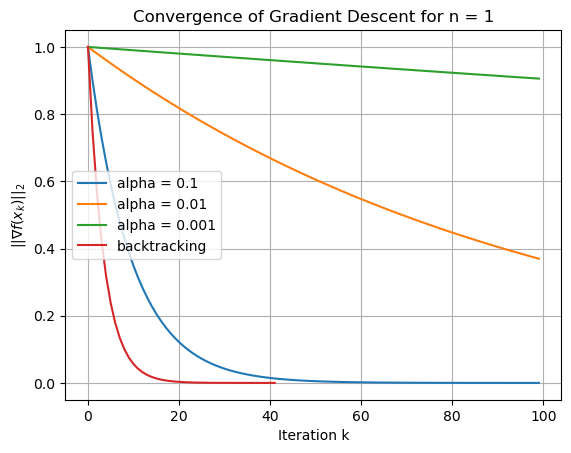

{0: np.float64(3.605551275463989), 1: np.float64(2.6627053911388696), 2: np.float64(1.9669773765857093), 3: np.float64(1.4537403482052769), 4: np.float64(1.0753035710905086), 5: np.float64(0.7964816644468347), 6: np.float64(0.591323471197449), 7: np.float64(0.44069578689210354), 8: np.float64(0.33049574528203335), 9: np.float64(0.25032313650276666), 10: np.float64(0.19248664240328608), 11: np.float64(0.15125269861457785), 12: np.float64(0.12227953058272847), 13: np.float64(0.10221237801254691), 14: np.float64(0.08843182718555637), 15: np.float64(0.0789250094703518), 16: np.float64(0.07221290857952165), 17: np.float64(0.06727181444830321), 18: np.float64(0.06343302175002885), 19: np.float64(0.06027940674639386), 20: np.float64(0.05755893169810287), 21: np.float64(0.05512217141719248), 22: np.float64(0.0528812662908043), 23: np.float64(0.05078449650892031), 24: np.float64(0.04880108766755987), 25: np.float64(0.04691232398736703), 26: np.float64(0.04510641651220299), 27: np.float64(0.0433

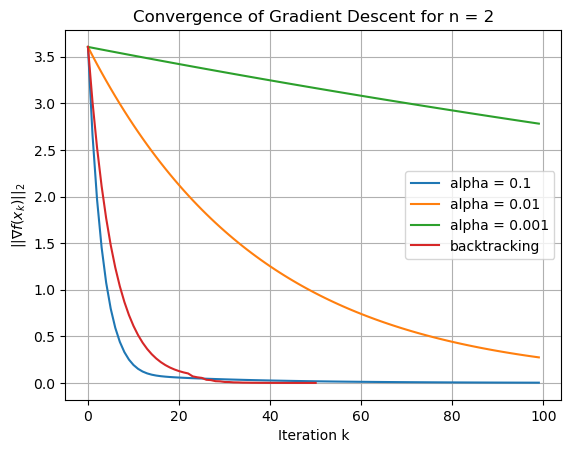

{0: np.float64(12.89742164068603), 1: np.float64(4.23848887051531), 2: np.float64(1.456855215365123), 3: np.float64(0.6278967919652254), 4: np.float64(0.42014108045600235), 5: np.float64(0.3554032599569978), 6: np.float64(0.3152214788447543), 7: np.float64(0.28148552514608505), 8: np.float64(0.251590665961303), 9: np.float64(0.22489948327622827), 10: np.float64(0.2010447429569192), 11: np.float64(0.17972231411232545), 12: np.float64(0.16066321614979578), 13: np.float64(0.14362735924553022), 14: np.float64(0.1284001786940301), 15: np.float64(0.11478989187870954), 16: np.float64(0.1026250779842335), 17: np.float64(0.09175251838024416), 18: np.float64(0.0820352667126393), 19: np.float64(0.07335092394185616), 20: np.float64(0.06559009654047061), 21: np.float64(0.05865501841268955), 22: np.float64(0.052458319161372904), 23: np.float64(0.04692192316609076), 24: np.float64(0.04197606557541192), 25: np.float64(0.03755841277879725), 26: np.float64(0.03361327622584556), 27: np.float64(0.03009090

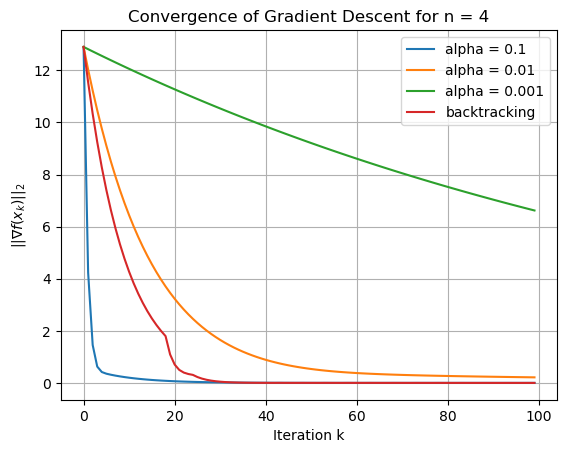

{0: np.float64(59.49950108185856), 1: np.float64(61.51087087679743), 2: np.float64(63.73784987084973), 3: np.float64(66.08726429657268), 4: np.float64(68.5350727848199), 5: np.float64(71.07686998038794), 6: np.float64(73.7138741464041), 7: np.float64(76.44897881357933), 8: np.float64(79.28564393321926), 9: np.float64(82.22758712444723), 10: np.float64(85.27870037359327), 11: np.float64(88.44303035386656), 12: np.float64(91.72477679969079), 13: np.float64(95.12829611042133), 14: np.float64(98.65810657748048), 15: np.float64(102.31889422512022), 16: np.float64(106.11551898625824), 17: np.float64(110.05302114095177), 18: np.float64(114.13662800333684), 19: np.float64(118.3717608595007), 20: np.float64(122.76404216368202), 21: np.float64(127.31930300183166), 22: np.float64(132.04359083228695), 23: np.float64(136.94317751378574), 24: np.float64(142.02456763145693), 25: np.float64(147.2945071318296), 26: np.float64(152.75999227831667), 27: np.float64(158.42827893905618), 28: np.float64(164.3

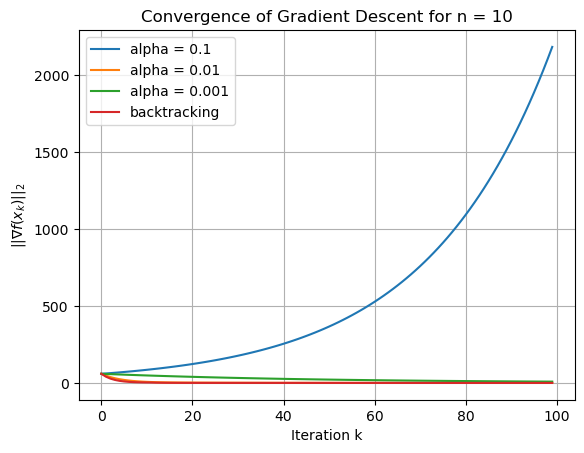

In [55]:
for n in [1, 2, 4, 10]:
    A, b = generate_vandermonde_and_b(n)
    x0 = np.zeros(n)
    maxit = 100
    gradient_a_3, x_a_3 = gradient_descent_matrix(grad_f_3, A, b, x0, maxit, 0.1)
    print(gradient_a_3)
    gradient_b_3, x_b_3 = gradient_descent_matrix(grad_f_3, A, b, x0, maxit, 0.01)
    gradient_c_3, x_c_3 = gradient_descent_matrix(grad_f_3, A, b, x0, maxit, 0.001)
    gradient_d_3, x_d_3 = gradient_descent_with_backtracking_m(f_3, grad_f_3, A, b, x0, maxit)
    # Prepare data for plotting
    xa = list(gradient_a_3.keys())
    ya = list(gradient_a_3.values())
    xb = list(gradient_b_3.keys())
    yb = list(gradient_b_3.values())
    xc = list(gradient_c_3.keys())
    yc = list(gradient_c_3.values())
    xd = list(gradient_d_3.keys())
    yd = list(gradient_d_3.values())
    # Plot the results
    plt.plot(xa, ya, label="alpha = 0.1")
    # plt.yscale('log') 
    plt.plot(xb, yb, label="alpha = 0.01")
    plt.plot(xc, yc, label="alpha = 0.001")
    plt.plot(xd, yd, label="backtracking")

    plt.xlabel("Iteration k")
    plt.ylabel(r"$||\nabla f(x_k)||_2$")
    plt.title(f"Convergence of Gradient Descent for n = {n}")
    plt.legend()
    plt.grid()
    plt.show()

We immediatly notice how the function is more and more "ripid" (has very high values of the gradient at x0 = [0]*n) with increasing values of n. This leads the gradient descent with alpha = 0.1 to be the most suitable, until we have n=10. In this case the step rate ends up being too big for the valley it's supposed to descend, resulting in its divergence. Let's analyse the behaviour of the other algorithms more clearly for n=10:

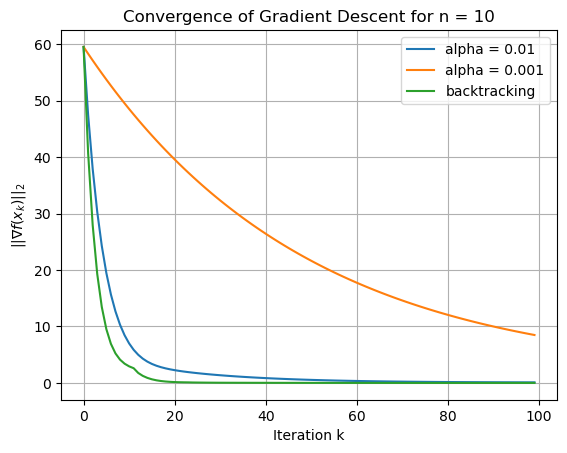

In [56]:
plt.plot(xb, yb, label="alpha = 0.01")
plt.plot(xc, yc, label="alpha = 0.001")
plt.plot(xd, yd, label="backtracking")

plt.xlabel("Iteration k")
plt.ylabel(r"$||\nabla f(x_k)||_2$")
plt.title(f"Convergence of Gradient Descent for n = {n}")
plt.legend()
plt.grid()
plt.show()

They still manage to descend, despite the narrow valley of our function

grad_f type: <class 'function'>


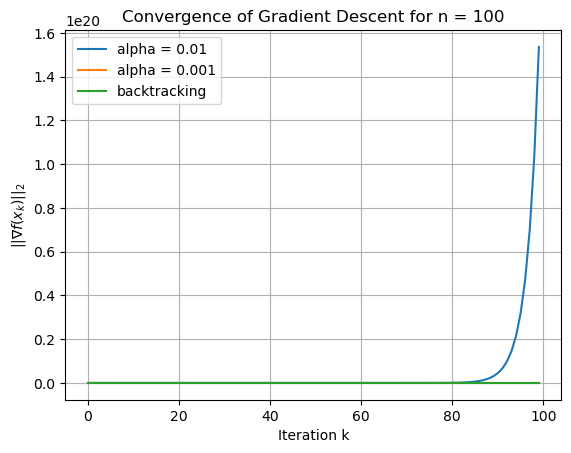

In [57]:
n = 100
A, b = generate_vandermonde_and_b(n)
x0 = np.zeros(n)
maxit = 100
gradient_a_3, x_a_3 = gradient_descent_matrix(grad_f_3, A, b, x0, maxit, 0.1)
gradient_b_3, x_b_3 = gradient_descent_matrix(grad_f_3, A, b, x0, maxit, 0.01)
gradient_c_3, x_c_3 = gradient_descent_matrix(grad_f_3, A, b, x0, maxit, 0.001)
gradient_d_3, x_d_3 = gradient_descent_with_backtracking_m(f_3, grad_f_3, A, b, x0, maxit)
# Prepare data for plotting
xa = list(gradient_a_3.keys())
ya = list(gradient_a_3.values())
xb = list(gradient_b_3.keys())
yb = list(gradient_b_3.values())
xc = list(gradient_c_3.keys())
yc = list(gradient_c_3.values())
xd = list(gradient_d_3.keys())
yd = list(gradient_d_3.values())
# Plot the results
# plt.plot(xa, ya, label="alpha = 0.1")
# plt.yscale('log') 
plt.plot(xb, yb, label="alpha = 0.01")
plt.plot(xc, yc, label="alpha = 0.001")
plt.plot(xd, yd, label="backtracking")

plt.xlabel("Iteration k")
plt.ylabel(r"$||\nabla f(x_k)||_2$")
plt.title(f"Convergence of Gradient Descent for n = {n}")
plt.legend()
plt.grid()
plt.show()

Incrementing n value to 100 we see that another alhpa values ends up being problematic for our gradient descent goal, and it's the alpha = 0.01
Let's then compare the performances of the last two functions that still manage to converge to a value

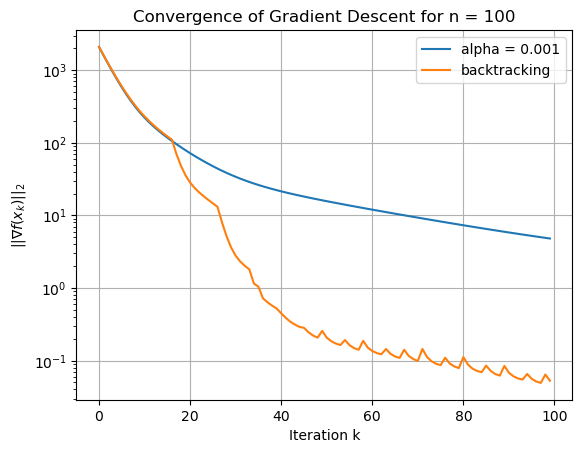

In [58]:

plt.plot(xc, yc, label="alpha = 0.001")
plt.plot(xd, yd, label="backtracking")
plt.yscale("log")
plt.xlabel("Iteration k")
plt.ylabel(r"$||\nabla f(x_k)||_2$")
plt.title(f"Convergence of Gradient Descent for n = {n}")
plt.legend()
plt.grid()
plt.show()

Plotting the logarithmic progression of the gradient on the iterations, we see that the backtracking ends up being the most accurate algorithm for very ripid functions. It's of particular interest how we can even see how the backtracking algorithm adjust its step rate progressively

## Function 4

grad_f type: <class 'function'>


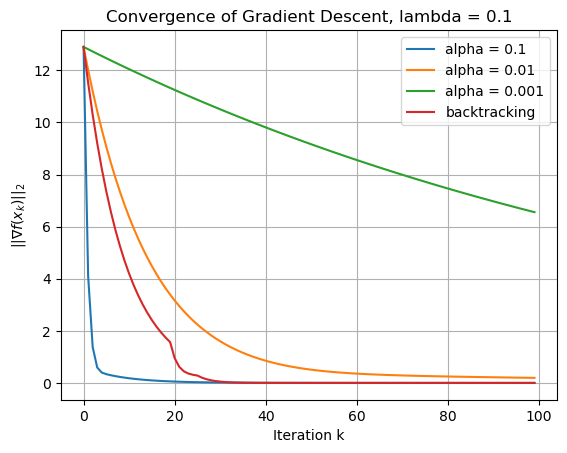

grad_f type: <class 'function'>


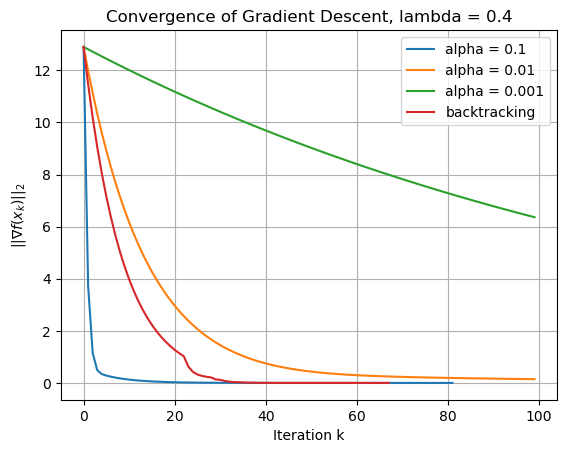

grad_f type: <class 'function'>


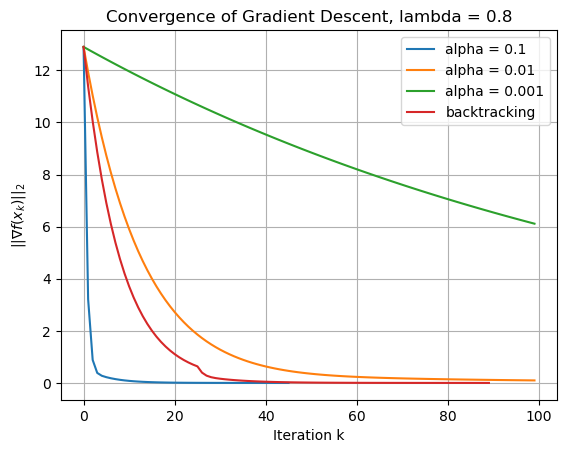

grad_f type: <class 'function'>


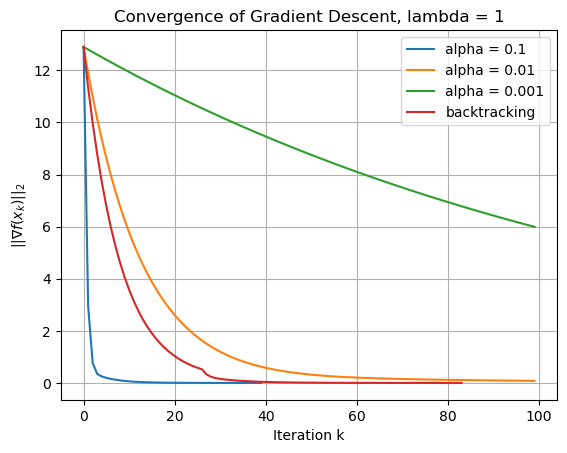

In [59]:
n = 4
A, b = generate_vandermonde_and_b(n)
x0 = np.zeros(n)
maxit = 100
for lamb in [0.1, 0.4, 0.8, 1]:
    gradient_a_4, x_a_4 = gradient_descent_matrix(grad_f_4, A, b, x0, maxit, 0.1, lamb)
    gradient_b_4, x_b_4 = gradient_descent_matrix(grad_f_4, A, b, x0, maxit, 0.01, lamb)
    gradient_c_4, x_c_4 = gradient_descent_matrix(grad_f_4, A, b, x0, maxit, 0.001, lamb)
    gradient_d_4, x_d_4 = gradient_descent_with_backtracking_m(f_4, grad_f_4, A, b, x0, maxit, lamb)
    # Prepare data for plotting
    xa = list(gradient_a_4.keys())
    ya = list(gradient_a_4.values())
    xb = list(gradient_b_4.keys())
    yb = list(gradient_b_4.values())
    xc = list(gradient_c_4.keys())
    yc = list(gradient_c_4.values())
    xd = list(gradient_d_4.keys())
    yd = list(gradient_d_4.values())
    # Plot the results
    plt.plot(xa, ya, label="alpha = 0.1")
    # plt.yscale('log') 
    plt.plot(xb, yb, label="alpha = 0.01")
    plt.plot(xc, yc, label="alpha = 0.001")
    plt.plot(xd, yd, label="backtracking")

    plt.xlabel("Iteration k")
    plt.ylabel(r"$||\nabla f(x_k)||_2$")
    plt.title(f"Convergence of Gradient Descent, lambda = {lamb}")
    plt.legend()
    plt.grid()
    plt.show()


## Function 5

C:\Users\dales\AppData\Local\Temp\ipykernel_13848\158220810.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


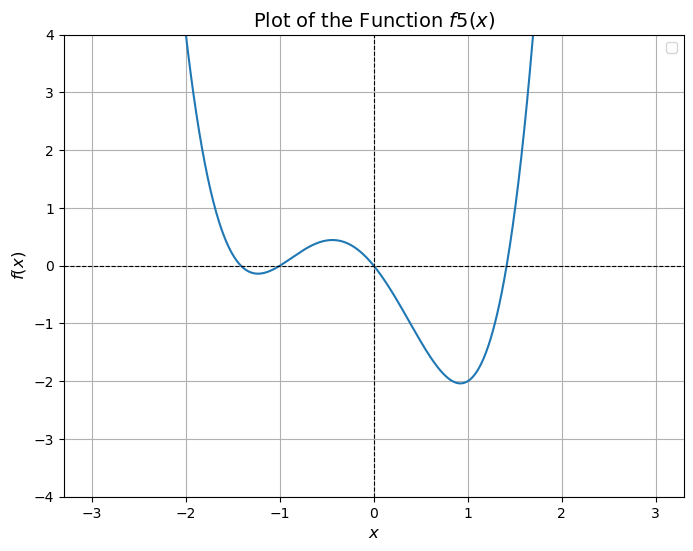

In [60]:
## plot the function 5
x = np.linspace(-3, 3, 1000)  # Start, end, number of points

# Compute the corresponding y values
y = f_5(x)

# Plot the function
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.plot(x, y)  # Add a label for the function
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add x-axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add y-axis
plt.title("Plot of the Function $f 5(x)$", fontsize=14)
plt.ylim(-4, 4) 
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$f(x)$", fontsize=12)
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()

The fifth function appears not to be a convex function. This implies that there's more than one function minimum. The gradient descent might indeed struggle to find the global minimum. We are gonna test our theory comparing the performances of our previously developed algorithms, providing them with a different starting position every time.

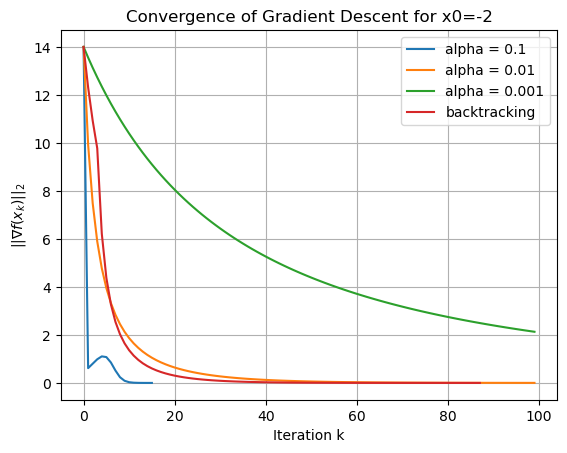

------ RESULTS FOR COMPUTATION WITH STARTING POINT : -2 ------
The minimum found by GD with alpha = 0.1 is : -0.138
The minimum found by GD with alpha = 0.01 is : -0.138
The minimum found by GD with alpha = 0.001 is : 0.07
The minimum found by the backtracking is : -0.138


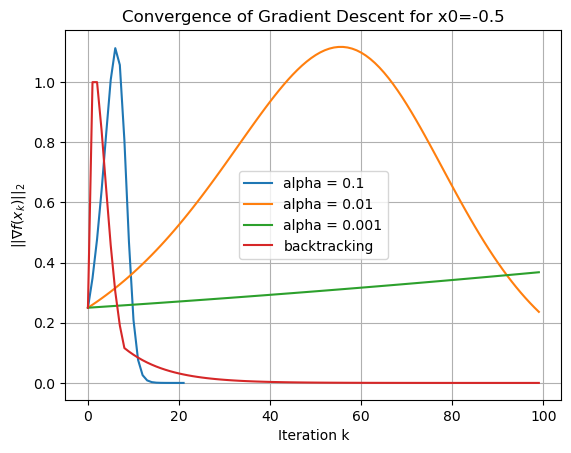

------ RESULTS FOR COMPUTATION WITH STARTING POINT : -0.5 ------
The minimum found by GD with alpha = 0.1 is : -0.138
The minimum found by GD with alpha = 0.01 is : -0.134
The minimum found by GD with alpha = 0.001 is : 0.428
The minimum found by the backtracking is : -0.138


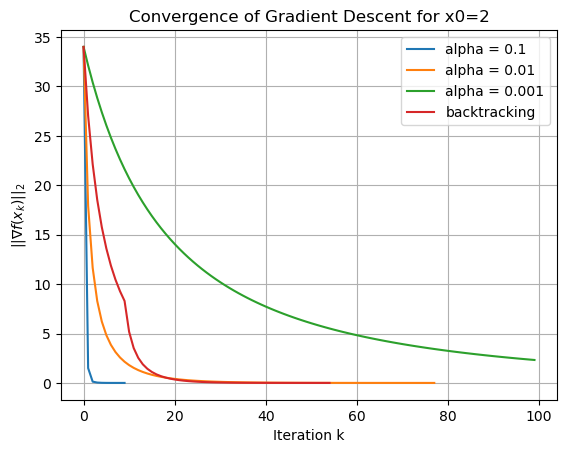

------ RESULTS FOR COMPUTATION WITH STARTING POINT : 2 ------
The minimum found by GD with alpha = 0.1 is : -0.138
The minimum found by GD with alpha = 0.01 is : -2.038
The minimum found by GD with alpha = 0.001 is : -1.864
The minimum found by the backtracking is : -2.038


In [61]:
maxit = 100
for x0 in [-2, -0.5, 2]:   
    gradient_a_5, x_a_5, _ = gradient_descent(grad_f_5, x0, maxit, 0.1)
    gradient_b_5, x_b_5, _  = gradient_descent(grad_f_5, x0, maxit, 0.01)
    gradient_c_5, x_c_5, _  = gradient_descent(grad_f_5, x0, maxit, 0.001)
    gradient_d_5, x_d_5, _  = gradient_descent_with_backtracking(f_5, grad_f_5, x0, maxit)
    # Prepare data for plotting
    xa = list(gradient_a_5.keys())
    ya = list(gradient_a_5.values())
    xb = list(gradient_b_5.keys())
    yb = list(gradient_b_5.values())
    xc = list(gradient_c_5.keys())
    yc = list(gradient_c_5.values())
    xd = list(gradient_d_5.keys())
    yd = list(gradient_d_5.values())
    # Plot the results
    plt.plot(xa, ya, label="alpha = 0.1")
    # plt.yscale('log') 
    plt.plot(xb, yb, label="alpha = 0.01")
    plt.plot(xc, yc, label="alpha = 0.001")
    plt.plot(xd, yd, label="backtracking")

    plt.xlabel("Iteration k")
    plt.ylabel(r"$||\nabla f(x_k)||_2$")
    plt.title(f"Convergence of Gradient Descent for x0={x0}")
    plt.legend()
    plt.grid()
    plt.show()
    print(f"------ RESULTS FOR COMPUTATION WITH STARTING POINT : {x0} ------")
    print(f"The minimum found by GD with alpha = 0.1 is : {round(f_5(x_a_5), 3)}")
    print(f"The minimum found by GD with alpha = 0.01 is : {round(f_5(x_b_5), 3)}")
    print(f"The minimum found by GD with alpha = 0.001 is : {round(f_5(x_c_5), 3)}")
    print(f"The minimum found by the backtracking is : {round(f_5(x_d_5), 3)}")

As we can notice, not all algorithm reach the clobal minimum in the number of iteration given, if ever. Our function has 2 minima, the first being at f(x_1) = -0.138, the second at f(x_2) = -2.038.
We can see how with a starting point closer to the first minimum all the algorithms get stuck in the local minimum (the closesto one), without ever making it to the global minimum. This is not true for x0 = 0.5, a starting point positioned between the two values of interest, where we can see how still none of the given algorithm finds the global solution. For x0 = 2 the global solution is found in only two cases. 


## Optimization via Stochastic Gradient Descent
Consider a dataset $(X,Y)$, where:

$$
X = \begin{bmatrix} x^1 & x^2 & \dots & x^N \end{bmatrix} \in \mathbb{R}^{d \times N}, \qquad Y = \begin{bmatrix} y^1 & y^2 & \dots & y^N \end{bmatrix} \in \mathbb{R}^N,
$$

together with a model $f_\theta(x)$, with vector of parameters $\theta$. **Training** a ML model requires solving:

$$
\theta^* = \arg\min_{\theta} \ell(\theta; X, Y) = \arg\min_{\theta} \sum_{i=1}^N \ell_i(\theta; x^i, y^i). 
$$

Since the optimization problem above is written as a sum of independent terms that only depends on the single datapoints, it satisfies the hypothesis for the application of the Stochastic Gradient Descent (SGD) algorithm, which articulates as follows:

* Given an integer `batch_size`, *randomly* extract a sub-dataset $\mathcal{M}$ such that $|\mathcal{M}| = `batch_size`$ from the original dataset. Note that the random sampling at each iteration has to be done without replacement.
* Compute the gradient of the loss function on the sampled batch $\mathcal{M}$ as:

  $$
  \nabla \ell(\theta; \mathcal{M}) = \frac{1}{| \mathcal{M} |} \sum_{i \in \mathcal{M}} \nabla \ell (\theta; x^i, y^i),
  $$
* Compute one single iteration of the GD algorithm on the direction described by $\nabla \ell(\theta; \mathcal{M})$:

  $$
  \theta_{k+1} = \theta_k - \alpha_k \nabla \ell(\theta_k; \mathcal{M}),
  $$

* Repeat until the full dataset has been extracted. When this happens, we say that we completed an **epoch** of the SGD method. Repeat this procedure for a number of epochs equal to a parameter `n_epochs`, given as input.

Consider the dataset `poly_regression_large.csv`, provided on Virtuale, and let $f_\theta(x)$ be a polynomial regression model, as discussed in https://devangelista2.github.io/statistical-mathematical-methods/regression_classification/regression.html.

* Split the dataset into training and test set as in the Homework 2, with a proportion of 80% training and 20% test. 
* Fix a degree $K$ for the polynomial. 
* Train the polynomial regression model on the training set via the Stochastic Gradient Descent algorithm.
* Train the polynomial regression model on the training set via the Gradient Descent algorithm.
* Train the polynomial regression model on the `poly_regression_small.csv` dataset. Use the full dataset for this test, without splitting it into training and test set.
* Compare the performance of the three regression model computed above. In particular, if $(X_{test}, Y_{test})$ is the test set from the `poly_regression_large.csv` dataset, for each of the model, compute:

  $$
  Err = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (f_\theta(x^i) - y^i)^2,
  $$

  where $N_{test}$ is the number of elements in the test set, $(x^i, y^i)$ are the input and output elements in the test set. Comment the performance of the three models.

* Repeat the experiment by varying the degree $K$ of the polynomial. Comment the results.
* Set $K=5$ (so that the polynomial regression model is a polynomial of degree 4). Compare the parameters learned by the three models with the true parameter $\theta^* = [0, 0, 4, 0, -3]$.

Important functions:

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# We extract the data
data = pd.read_csv('../../data-20241122/poly_regression_large.csv')

X, y = data["x"], data["y"]
K = 5

## We define our function f as a polynomial of degree = theta.len,  
## thetas will be the learned values, wights of the function with variable x
def f(X, theta):
    X = np.array(X)  
    return np.sum([theta[j] * X**j for j in range(len(theta))], axis=0)


## We define our loss as the MSE of the prediction compared to the real value
def loss(theta, X, y):
    y_pred = f(X, theta)
    error = np.square(y_pred - y)
    return np.mean(error)


## We also need a function that computes the gradient of the loss function
def grad_loss(theta, X, y):
    N = len(y)  # Batch size
    gradient = np.zeros_like(theta)  # Same dimension as theta
    for j in range(len(theta)):
        gradient[j] = (2 / N) * np.sum((f(X, theta) - y) * X**j)
    return gradient


## We divide our dataset in to train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We define the SGD algorithm

In [63]:
## we use the SGD function explained during the lesson
def SGD(loss, grad_loss, X, y, theta0, alpha, batch_size, n_epochs):
    N = X.shape[0] # We assume both X and Y has shape (N, )
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling
    # print(X.shape)
    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch

    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        # np.random.shuffle(idx)
        ## We want to keep the data aligned with the index idx
        
        X = np.asarray(X)[idx]
        y = np.asarray(y)[idx]


        # Initialize a vector that saves the gradient of the loss at each iteration

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(theta, X_batch, y_batch)

            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
    return theta_history

We define the Gradient Descent algorithm

In [64]:
## we now use a normal Gradient Descent training algorithm similar to the one 
## from the previous exercise. Only difference is that we now have the loss function 
def gradient_descent(loss, grad_loss, X, y, theta0, alpha, n_epochs):
 
    d = theta0.shape[0]  # Number of parameters
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    
    # Initialize weights
    theta = theta0
    
    for epoch in range(n_epochs):
        # Compute the gradient of the loss
        gradient = grad_loss(theta, X, y)
        
        # Update weights
        theta = theta - alpha * gradient
        
        # Save the updated values
        theta_history[epoch] = theta
   
    ## We update the theta history for each iteration as well as the loss history (to plot later)
    return theta_history


Let's train our model with the SGD on the large dataset

In [65]:
theta0 = np.zeros(K + 1)  # Initial theta for a polynomial of degree 3
alpha = 0.01  # Learning rate
batch_size = 20  # Batch size
n_epochs = 100  # Number of epochs

# Train the model using SGD
theta_history_SGD= SGD(loss, grad_loss, X_train, y_train, 
                       theta0, alpha, batch_size, n_epochs)

theta_SGD = theta_history_SGD[-1]
# Print final parameters
print("Trained parameters (theta):", theta_history_SGD[-1])

Trained parameters (theta): [-0.05527403  1.34537475  0.71551152  0.12516811 -0.28894959 -0.5650276 ]


Let's train our model with the GD on the large dataset

In [66]:
# Parameters
theta0 = np.zeros(K + 1)  # Initial theta for a polynomial of degree 3
alpha = 0.01  # Learning rate
n_epochs = 100  # Number of epochs

# Train the model using Gradient Descent
theta_history_GD= gradient_descent(loss, grad_loss, X_train, y_train, 
                                   theta0, alpha, n_epochs)

theta_GD = theta_history_GD[-1]

# Print final parameters
print("Trained parameters (theta):", theta_history_GD[-1])

Trained parameters (theta): [0.37752731 0.34493493 0.26016123 0.1978032  0.15407692 0.12284888]


In [67]:
data_small = pd.read_csv('../../data-20241122/poly_regression_small.csv')

X_small, y_small = data_small["x"], data_small["y"]

Let's train our model with the GD on the samll dataset

In [68]:
theta_history_small = gradient_descent(loss, grad_loss, X_small, y_small, theta0, alpha, n_epochs)

theta_small = theta_history_small[-1]
# Print final parameters
print("Trained parameters (theta):", theta_history_small[-1])




Trained parameters (theta): [0.37260291 0.33972729 0.25574533 0.19313077 0.14889635 0.1172391 ]


We define the error computation function

In [69]:
def compute_error(f, theta, X_test, y_test):
    N_test = len(X_test)
    predictions = f(X_test, theta)
    error = (1 / N_test) * np.sum((predictions - y_test)**2)
    return error
    

In [70]:
def print_results(theta_SGD, theta_GD, theta_small):
    print(f"Error of SGD trained model on large dataset : {compute_error(f, theta_SGD, X_test, y_test)}")
    print(f"Error of GD trained model on large dataset : {compute_error(f, theta_GD, X_test, y_test)}")
    print(f"Error of GD trained model on small dataset : {compute_error(f, theta_small, X_test, y_test)}")
print_results(theta_SGD, theta_GD, theta_small)

Error of SGD trained model on large dataset : 0.017751946426603646
Error of GD trained model on large dataset : 0.0844945317018859
Error of GD trained model on small dataset : 0.08568333986262396


The model trained with the SDG presents better accuracy. This has to be expected since it explores the parameters space better, since it updates the weights more often. The results obtained on the models trained with the GD method are pretty similar, only difference is that the one trained on the small dataset performs a bit worse, given that it had smaller chance to learn from the data.

In [71]:
 # Initial theta for a polynomial of degree 3
alpha = 0.01  # Learning rate
n_epochs = 100
batch_size = 20 
for K in [2, 4, 5, 10]:
    theta0 = np.zeros(K + 1) 
    print(f"------ Performance results for K = {K}")
    theta_history_SGD= SGD(loss, grad_loss, X_train, y_train, 
                       theta0, alpha, batch_size, n_epochs)
    theta_SGD = theta_history_SGD[-1]

    theta_history_GD= gradient_descent(loss, grad_loss, X_train, y_train, 
                                   theta0, alpha, n_epochs)
    theta_GD = theta_history_GD[-1]

    theta_history_small = gradient_descent(loss, grad_loss, X_small, y_small, 
                                           theta0, alpha, n_epochs)
    theta_small = theta_history_small[-1]
    print_results(theta_SGD, theta_GD, theta_small)


------ Performance results for K = 2
Error of SGD trained model on large dataset : 0.0393467897078618
Error of GD trained model on large dataset : 0.0968241944322853
Error of GD trained model on small dataset : 0.09780856735188036
------ Performance results for K = 4
Error of SGD trained model on large dataset : 0.024882148647783355
Error of GD trained model on large dataset : 0.08318738612715083
Error of GD trained model on small dataset : 0.08441918016139197
------ Performance results for K = 5
Error of SGD trained model on large dataset : 0.017751946426603646
Error of GD trained model on large dataset : 0.0844945317018859
Error of GD trained model on small dataset : 0.08568333986262396
------ Performance results for K = 10
Error of SGD trained model on large dataset : 0.010618541748889924
Error of GD trained model on large dataset : 0.09422533732489521
Error of GD trained model on small dataset : 0.0941282129550935


Interesting to notice how the GD trained models get worse and worse with the increase of K, proving their obvious overfitting. The opposite happens instead to the SGD trained model, that keeps improving.

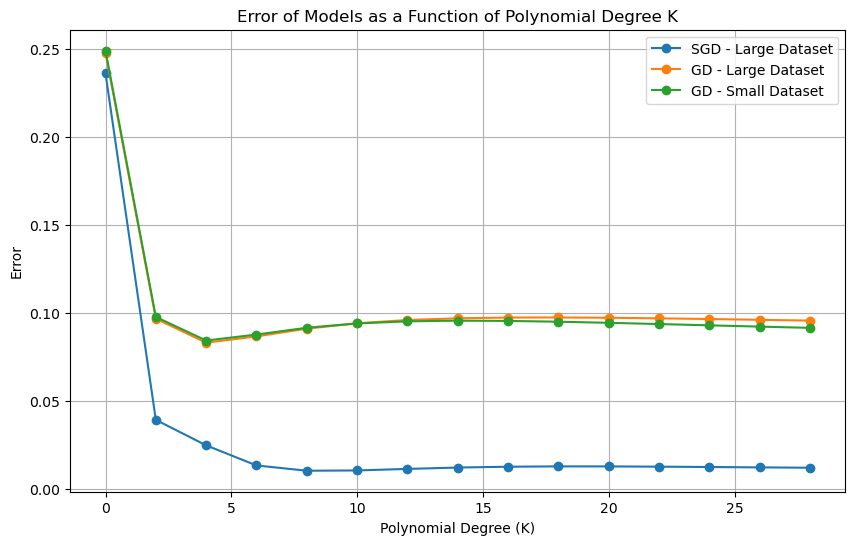

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store errors
K_values = range(0,30, 2)
errors_SGD = []
errors_GD_large = []
errors_GD_small = []

def print_results(theta_SGD, theta_GD, theta_small):
    error_SGD = compute_error(f, theta_SGD, X_test, y_test)
    error_GD_large = compute_error(f, theta_GD, X_test, y_test)
    error_GD_small = compute_error(f, theta_small, X_test, y_test)
    
    # Append errors to lists for plotting
    errors_SGD.append(error_SGD)
    errors_GD_large.append(error_GD_large)
    errors_GD_small.append(error_GD_small)
    
    # Print the results
    # print(f"Error of SGD trained model on large dataset : {error_SGD}")
    # print(f"Error of GD trained model on large dataset : {error_GD_large}")
    # print(f"Error of GD trained model on small dataset : {error_GD_small}")

# Run for each K and collect errors
for K in K_values:
    theta0 = np.zeros(K + 1) 
    # print(f"------ Performance results for K = {K} ------")
    
    # Train with SGD
    theta_history_SGD = SGD(loss, grad_loss, X_train, y_train, 
                            theta0, alpha, batch_size, n_epochs)
    theta_SGD = theta_history_SGD[-1]

    # Train with GD on large dataset
    theta_history_GD = gradient_descent(loss, grad_loss, X_train, y_train, 
                                        theta0, alpha, n_epochs)
    theta_GD = theta_history_GD[-1]

    # Train with GD on small dataset
    theta_history_small = gradient_descent(loss, grad_loss, X_small, y_small, 
                                           theta0, alpha, n_epochs)
    theta_small = theta_history_small[-1]
    
    # Compute and store errors
    print_results(theta_SGD, theta_GD, theta_small)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_values, errors_SGD, label='SGD - Large Dataset', marker='o')
plt.plot(K_values, errors_GD_large, label='GD - Large Dataset', marker='o')
plt.plot(K_values, errors_GD_small, label='GD - Small Dataset', marker='o')

plt.xlabel('Polynomial Degree (K)')
plt.ylabel('Error')
plt.title('Error of Models as a Function of Polynomial Degree K')
plt.legend()
plt.grid()
plt.show()
